**Fazemos as importações**

In [131]:
import pandas as pd
import numpy as np
# Treinamento 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Teste 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
# Grafico
import matplotlib.pyplot as plt
import seaborn as sb
# KMeans
from sklearn.cluster import KMeans
# Warning
import warnings
warnings.filterwarnings("ignore")

**Lemos o Dataset e visualizamos**

In [132]:
df = pd.read_csv('https://objectstorage.sa-saopaulo-1.oraclecloud.com/n/gruhhwsnongf/b/Baldin/o/prouni_2005_2019prouni_2005_2019.csv', encoding='UTF-8')
df.head()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,idade
0,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Enfermagem,Integral,***264740**,F,Branca,1987-02-17,nao,SUL,RS,santo angelo,34.0
1,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Servico Social,Noturno,***976940**,F,Parda,1986-06-14,nao,SUL,RS,frederico westphalen,35.0
2,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Servico Social,Noturno,***045340**,F,Parda,1984-06-03,nao,SUL,RS,frederico westphalen,37.0
3,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Ciencia Da Computacao,Noturno,***988420**,M,Branca,1987-10-19,nao,SUL,RS,frederico westphalen,33.0
4,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Ciencia Da Computacao,Noturno,***378080**,M,Amarela,1987-07-20,nao,SUL,RS,frederico westphalen,34.0


**Tirando colunas que acho desnecessárias e limpando valores nulos**

In [133]:
df = df.drop(['NOME_IES_BOLSA', 'CODIGO_EMEC_IES_BOLSA',  'CPF_BENEFICIARIO_BOLSA', 'DT_NASCIMENTO_BENEFICIARIO', 'REGIAO_BENEFICIARIO_BOLSA', 'MUNICIPIO_BENEFICIARIO_BOLSA', 'SIGLA_UF_BENEFICIARIO_BOLSA'], axis=1)

**Verificar a quantidade de valores NaN em cada coluna**


In [134]:
print(df.isna().sum())

ANO_CONCESSAO_BOLSA                  0
TIPO_BOLSA                           0
MODALIDADE_ENSINO_BOLSA              0
NOME_CURSO_BOLSA                  5654
NOME_TURNO_CURSO_BOLSA               0
SEXO_BENEFICIARIO_BOLSA              0
RACA_BENEFICIARIO_BOLSA              0
BENEFICIARIO_DEFICIENTE_FISICO       0
idade                                0
dtype: int64


**Remover linhas com valores NaN**

In [135]:
df = df.dropna()

**Verificar novamente a quantidade de valores NaN em cada coluna após a remoção**

In [136]:
print(df.isna().sum())

ANO_CONCESSAO_BOLSA               0
TIPO_BOLSA                        0
MODALIDADE_ENSINO_BOLSA           0
NOME_CURSO_BOLSA                  0
NOME_TURNO_CURSO_BOLSA            0
SEXO_BENEFICIARIO_BOLSA           0
RACA_BENEFICIARIO_BOLSA           0
BENEFICIARIO_DEFICIENTE_FISICO    0
idade                             0
dtype: int64


**Filtrei para pegar apenas Beneficiário com deficiença**

In [137]:
pcd = df[df['BENEFICIARIO_DEFICIENTE_FISICO'] == 'sim']
pcd = pcd.drop('BENEFICIARIO_DEFICIENTE_FISICO', axis=1)

**Pegar os 10 cursos que mais aparecem apenas**

In [138]:
# Selecionar os 10 valores mais comuns
valores_mais_comuns = pcd['NOME_CURSO_BOLSA'].value_counts().head(10).index.tolist()

# Filtrar o dataset para manter apenas as linhas com os valores mais comuns
pcd = pcd[pcd['NOME_CURSO_BOLSA'].isin(valores_mais_comuns)]

**Tem uma linha com 120 anos, retirei para não criar um intervalo muito grande na normalização**

In [139]:
pcd = pcd[pcd['idade'] != pcd['idade'].max()]
pcd['idade'].max()

85.0

**Renomeando algumas colunas**

In [140]:
renomearCol = {
    'TIPO_BOLSA' : 'Bolsa',
    'NOME_CURSO_BOLSA' : 'Curso',
    'NOME_TURNO_CURSO_BOLSA' : 'Turno',
    'SEXO_BENEFICIARIO_BOLSA' : 'Sexo',
    'RACA_BENEFICIARIO_BOLSA' : 'Raca',
    'MODALIDADE_ENSINO_BOLSA' : 'Modalidade',
    'ANO_CONCESSAO_BOLSA' : 'Ano'
}
pcd = pcd.rename(columns=renomearCol)
pcd.head()

**Download do Dataset Tratado**

In [ ]:
pcd.to_csv('ProunistaDeficientes.csv', index=False)

**Selecionando as variáveis relevantes para a análise**

In [141]:
# Selecionando as variáveis relevantes para a análise
X = [ 'Turno', 'Curso', 'idade', 'Modalidade']

# Aplicando one-hot encoding nas variáveis categóricas
df_tratado = pd.get_dummies(pcd[X])

# Aplicando o K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_tratado)

# Adicionando as informações do cluster ao DataFrame original
pcd['cluster'] = kmeans.labels_

**Visualizando os clusters junto aos Cursos**


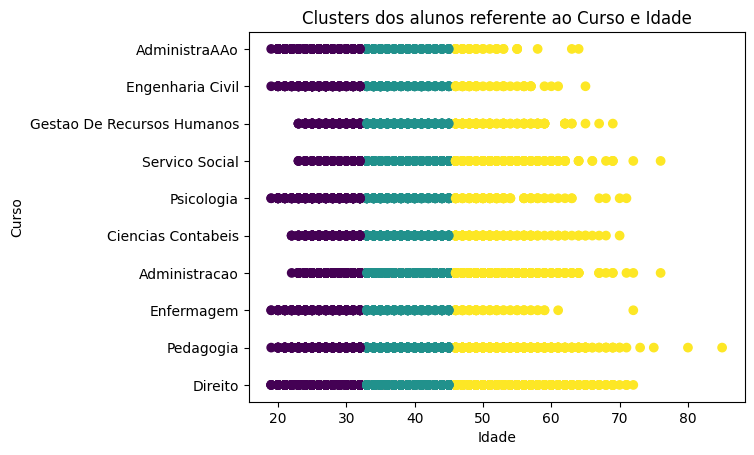

In [142]:
plt.scatter(pcd['idade'], pcd['Curso'], c=pcd['cluster'])
plt.xlabel('Idade')
plt.ylabel('Curso')
plt.title('Clusters dos alunos referente ao Curso e Idade')
plt.show()

**Visualizando os clusters junto as Modalidades e Cursos**

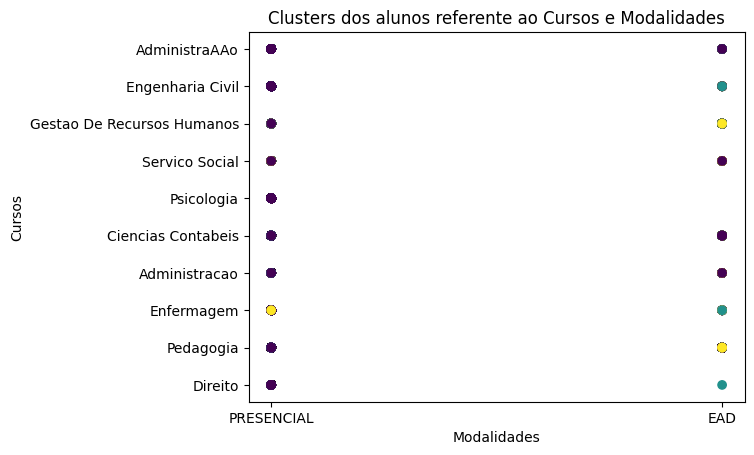

In [143]:
plt.scatter(pcd['Modalidade'], pcd['Curso'], c=pcd['cluster'])
plt.xlabel('Modalidades')
plt.ylabel('Cursos')
plt.title('Clusters dos alunos referente ao Cursos e Modalidades')
plt.show()

**Visualizando os clusters entre Bolsa e Curso**

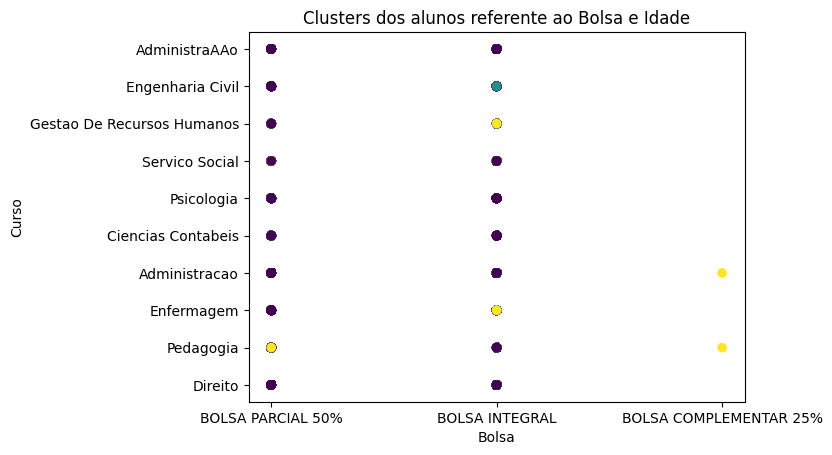

In [144]:
plt.scatter(pcd['Bolsa'], pcd['Curso'], c=pcd['cluster'])
plt.xlabel('Bolsa')
plt.ylabel('Curso')
plt.title('Clusters dos alunos referente ao Bolsa e Idade')
plt.show()

**Visualizando os clusters junto aos Raca**

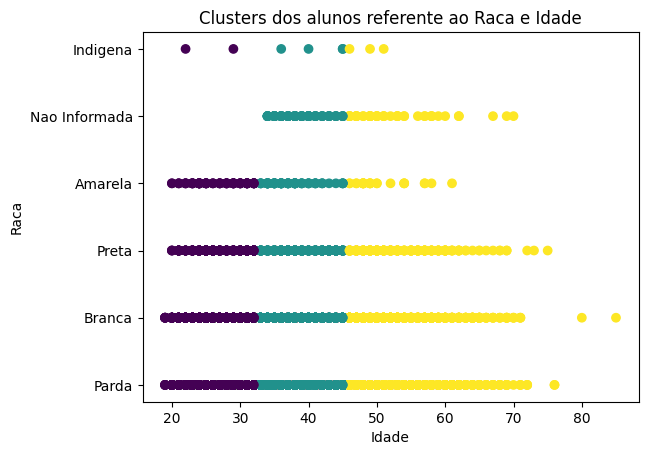

In [145]:
plt.scatter(pcd['idade'], pcd['Raca'], c=pcd['cluster'])
plt.xlabel('Idade')
plt.ylabel('Raca')
plt.title('Clusters dos alunos referente ao Raca e Idade')
plt.show()

**Visualizando os clusters junto aos Turno**

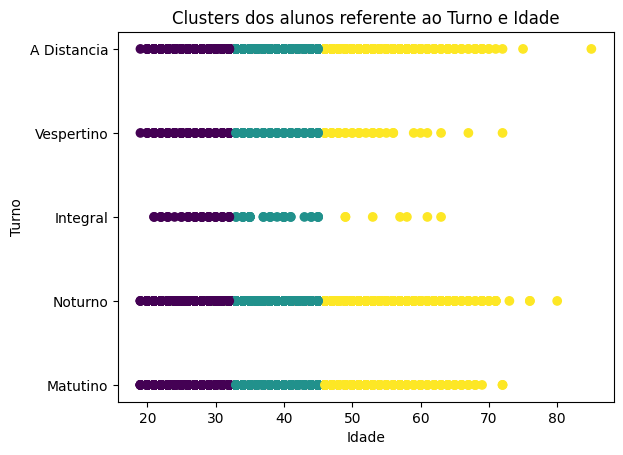

In [146]:
plt.scatter(pcd['idade'], pcd['Turno'], c=pcd['cluster'])
plt.xlabel('Idade')
plt.ylabel('Turno')
plt.title('Clusters dos alunos referente ao Turno e Idade')
plt.show()